# ECON3203 - Group DFM - Implementation File

<font color = purple> Faiyam Islam (z5258151) </font> 

<font color = purple> Mimi Nguyen (z5260968) </font>

<font color = purple> Dharani Palanisamy (z5260276) </font>

<font color = purple> Dharshini Loganathan (z5309765) </font>



This implementation file contains: 

1. Exploratory Data Analysis (EDA)
2. Simple Linear Regression
3. Multiple Linear Regression (with interaction terms)
4. LASSO, Ridge and Elastic Net Regression 

Due to the time-consumption of KNN and Neural Networks, we have decided to implement those methods on a separate file. 

# **Importing Packages**

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.formula.api as smf 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_context('notebook')
sns.set_style('ticks')
sns.set(style="ticks", color_codes=True)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

All the implementations have been completed on google collaboratory, which is why this line of code below was required.

# **Exploratory Data Analysis (EDA)**



Conducting basic exploratory data analysis, including data cleaning and obtaining statistics for initial data exploration. 

In [2]:
# Importing the ATM_training dataset 
train = pd.read_csv('ATM_training.csv') 
train.head()

,Shops,ATMs,Downtown,Weekday,Center,High,Withdraw
0,10.18,10,1,0,0,0,72.750556
1,9.74,10,1,1,0,0,66.720482
2,0.96,2,0,0,0,1,19.189516
3,9.58,9,1,1,0,1,67.388669
4,1.03,4,0,1,0,1,15.813127


In [3]:
# Exploring data types and null values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Shops     22000 non-null  float64
 1   ATMs      22000 non-null  int64  
 2   Downtown  22000 non-null  int64  
 3   Weekday   22000 non-null  int64  
 4   Center    22000 non-null  int64  
 5   High      22000 non-null  int64  
 6   Withdraw  22000 non-null  float64
dtypes: float64(2), int64(5)
memory usage: 1.2 MB


In [4]:
# Basic statistics of the covariates, including mean and standard deviation 
train.describe()

,Shops,ATMs,Downtown,Weekday,Center,High,Withdraw
count,22000.000000,22000.000000,22000.00000,22000.000000,22000.000000,22000.000000,22000.000000
mean,7.316373,7.937455,0.70200,0.714091,0.102455,0.301591,54.652818
std,4.118692,3.673415,0.45739,0.451857,0.303252,0.458959,25.099767
min,0.800000,0.000000,0.00000,0.000000,0.000000,0.000000,11.668197
25%,1.050000,4.000000,0.00000,0.000000,0.000000,0.000000,18.500386
50%,9.890000,9.000000,1.00000,1.000000,0.000000,0.000000,68.240749
75%,10.070000,11.000000,1.00000,1.000000,0.000000,1.000000,71.345778
max,10.830000,17.000000,1.00000,1.000000,1.000000,1.000000,103.964065


In [5]:
# Checking for duplicate values
duplicate = train.duplicated()
print(duplicate.sum())

0


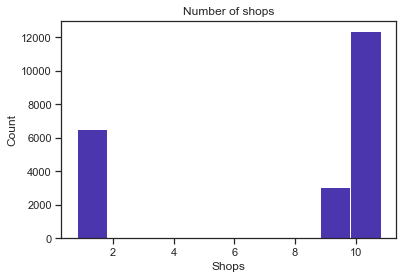

In [6]:
# Histogram showcasing distribution of the number of shops within walking distance of the ATM (in 100)
plt.hist(train['Shops'], color='#4c36ad', bins = 10)
plt.xlabel("Shops")
plt.ylabel("Count")
plt.title("Number of shops")
plt.show()

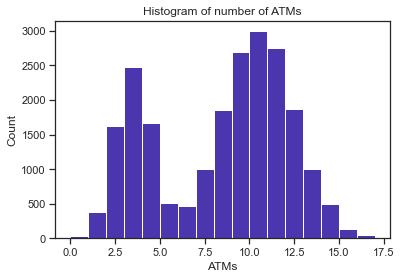

In [7]:
# Histogram of the number of ATMs within walking distance (in 10)
plt.hist(train['ATMs'], bins=17,color ='#4c36ad')
plt.xlabel("ATMs")
plt.ylabel("Count")
plt.title("Histogram of number of ATMs")
plt.show()

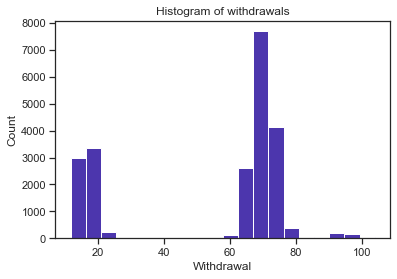

In [8]:
# Histogram of distribution of withdrawals amounts at local ATMs 
plt.hist(train['Withdraw'], color = '#4c36ad', bins = 20)
plt.xlabel("Withdrawal")
plt.ylabel("Count")
plt.title("Histogram of withdrawals")
plt.show()

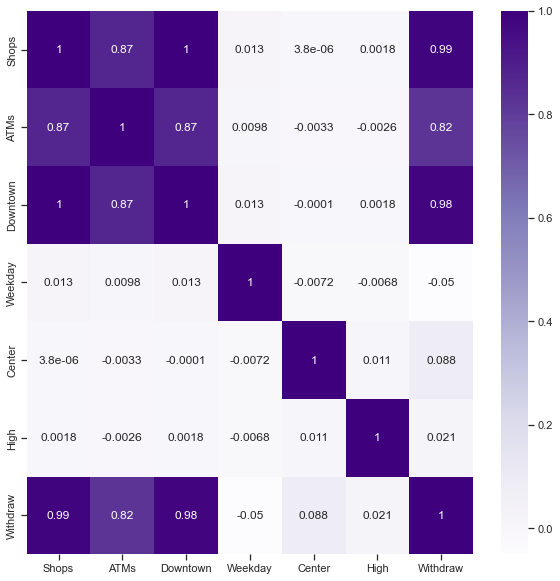

In [9]:
# Heatmap displaying the correlation matrix of all the covariates
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(),cbar=True,annot=True,cmap='Purples')
plt.show()

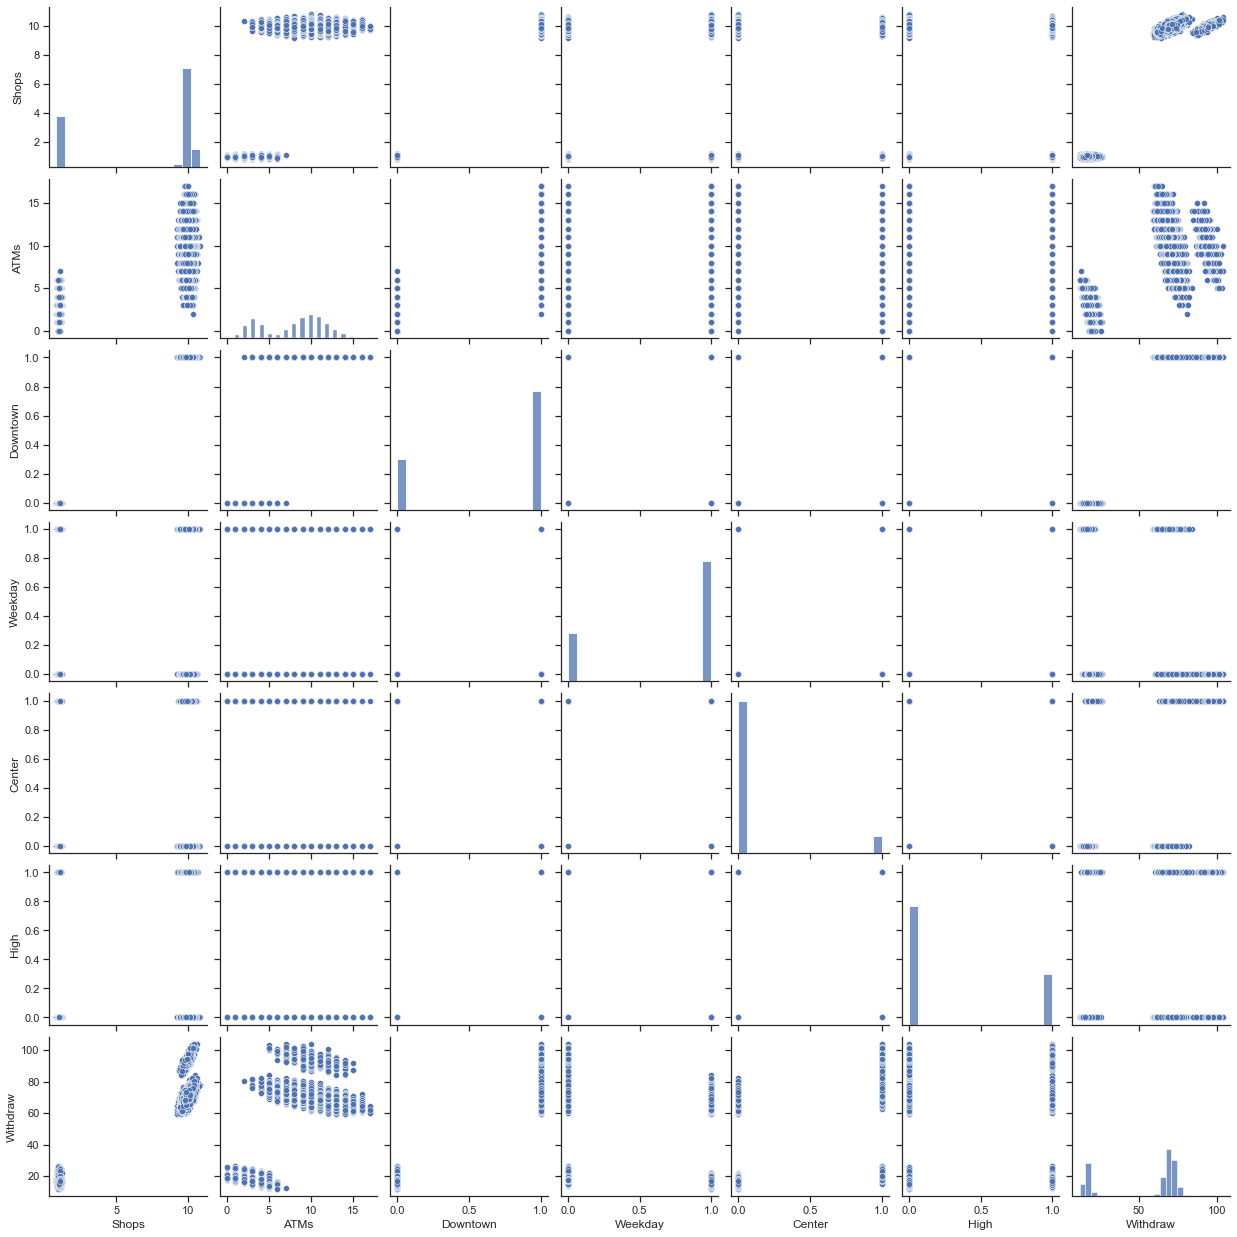

In [10]:
# A general overview of pairwise correlation between variables 
sns.pairplot(train, palette ='#432371')
plt.show()

In [11]:
# Numerical correlations between variables
correlations = train.corr()
print(correlations)

             Shops      ATMs  Downtown   Weekday    Center      High  Withdraw
Shops     1.000000  0.872903  0.999131  0.013014  0.000004  0.001820  0.985797
ATMs      0.872903  1.000000  0.873726  0.009766 -0.003306 -0.002616  0.824030
Downtown  0.999131  0.873726  1.000000  0.012664 -0.000101  0.001782  0.983574
Weekday   0.013014  0.009766  0.012664  1.000000 -0.007153 -0.006793 -0.050470
Center    0.000004 -0.003306 -0.000101 -0.007153  1.000000  0.010521  0.088103
High      0.001820 -0.002616  0.001782 -0.006793  0.010521  1.000000  0.021275
Withdraw  0.985797  0.824030  0.983574 -0.050470  0.088103  0.021275  1.000000


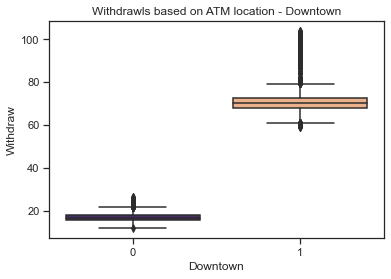

In [12]:
# Withdraw distribution based on ATM location
sns.boxplot(data = train, x='Downtown', y='Withdraw', palette=['#432371',"#FAAE7B"]).set_title("Withdrawls based on ATM location - Downtown")
plt.show()

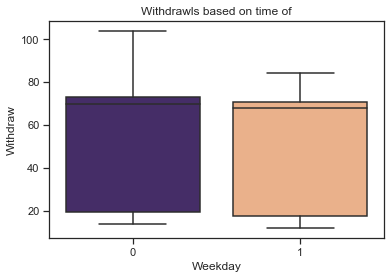

In [13]:
# Withdraw distribution based on time of week
sns.boxplot(data = train, x='Weekday', y='Withdraw', palette=['#432371',"#FAAE7B"]).set_title("Withdrawls based on time of")
plt.show()

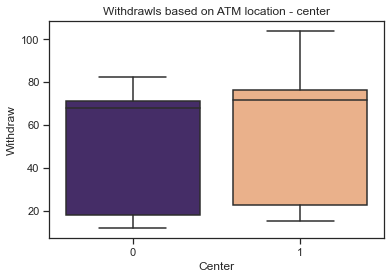

In [14]:
# Withdraw distribution based on whether ATM is in a center
sns.boxplot(data = train, x='Center', y='Withdraw', palette=['#432371',"#FAAE7B"]).set_title("Withdrawls based on ATM location - center")
plt.show()

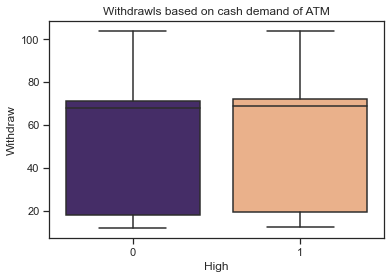

In [15]:
# Withdraw distribution based on whether ATM had high cash demand in the previous month
sns.boxplot(data = train, x = 'High', y='Withdraw', palette=['#432371',"#FAAE7B"]).set_title("Withdrawls based on cash demand of ATM")
plt.show()

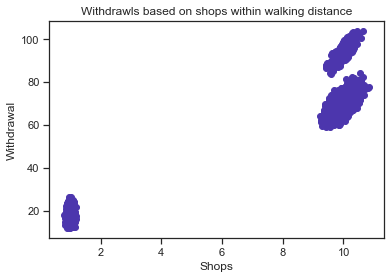

In [16]:
# Effect of the number of shops within walking distance on withdrawal
plt.scatter(data = train, x = 'Shops', y = 'Withdraw', color ='#4c36ad')
plt.xlabel("Shops")
plt.ylabel("Withdrawal")
plt.title("Withdrawls based on shops within walking distance")
plt.show()

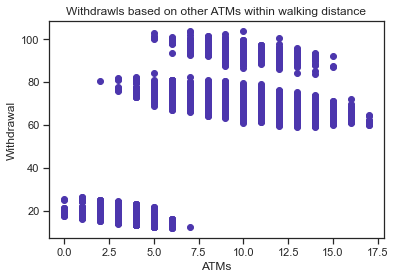

In [17]:
# Effect of the number of ATMs within walking distance on withdrawal
plt.scatter(data = train, x = 'ATMs', y = 'Withdraw', color ='#4c36ad')
plt.xlabel("ATMs")
plt.ylabel("Withdrawal")
plt.title("Withdrawls based on other ATMs within walking distance")
plt.show()

# **Simple Linear Regression**



In [18]:
#Standardising predictors

response = ['Withdraw']
numerical_predictors = ['Shops','ATMs','Downtown','Weekday','High','Center'] #numerical variables: no dummies

mu=train[numerical_predictors].mean() # mean for each feature
sigma=train[numerical_predictors].std() # std for each feature

train[numerical_predictors]=(train[numerical_predictors]-mu)/ sigma
train.head()

,Shops,ATMs,Downtown,Weekday,Center,High,Withdraw
0,0.695276,0.561479,0.651523,-1.580349,-0.337853,-0.657119,72.750556
1,0.588446,0.561479,0.651523,0.632743,-0.337853,-0.657119,66.720482
2,-1.543299,-1.616331,-1.534796,-1.580349,-0.337853,1.521724,19.189516
3,0.549598,0.289253,0.651523,0.632743,-0.337853,1.521724,67.388669
4,-1.526303,-1.071879,-1.534796,0.632743,-0.337853,1.521724,15.813127


In [19]:
# Function to compute MSE

def reg_test(predictors, response):    
    lm = LinearRegression()
    scores = cross_val_score(lm, train[predictors], train[response], cv=10, scoring = 'neg_mean_squared_error')
        # taking the average of scores across 10 folds
    cv_score = np.mean(scores)   
    return cv_score 
    

In [20]:
formula = "Withdraw ~ Shops"
model_formula = smf.ols(formula = formula, data = train)
results_formula = model_formula.fit()
print(results_formula.summary())

                            OLS Regression Results                            
Dep. Variable:               Withdraw   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                 7.580e+05
Date:                Fri, 12 Nov 2021   Prob (F-statistic):               0.00
Time:                        22:18:38   Log-Likelihood:                -62868.
No. Observations:               22000   AIC:                         1.257e+05
Df Residuals:                   21998   BIC:                         1.258e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     54.6528      0.028   1923.056      0.0

In [21]:
response = 'Withdraw'
predictors = ['Shops']
cv_rmse  =  reg_test(predictors, response)*-1 
print('Cross validation MSE : {}'.format(cv_rmse.round(4)))

Cross validation MSE : 17.7686


In [22]:
formula = "Withdraw ~ ATMs"
model_formula = smf.ols(formula = formula, data = train)
results_formula = model_formula.fit()
print(results_formula.summary())

                            OLS Regression Results                            
Dep. Variable:               Withdraw   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                 4.654e+04
Date:                Fri, 12 Nov 2021   Prob (F-statistic):               0.00
Time:                        22:18:38   Log-Likelihood:                -89619.
No. Observations:               22000   AIC:                         1.792e+05
Df Residuals:                   21998   BIC:                         1.793e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     54.6528      0.096    570.044      0.0

In [23]:
response = 'Withdraw'
predictors = ['ATMs']
cv_rmse  =  reg_test(predictors, response)*-1 
print('Cross validation MSE : {}'.format(cv_rmse.round(4)))

Cross validation MSE : 202.2269


In [24]:
formula = "Withdraw ~ Downtown"
model_formula = smf.ols(formula = formula, data = train)
results_formula = model_formula.fit()
print(results_formula.summary())

                            OLS Regression Results                            
Dep. Variable:               Withdraw   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                 6.532e+05
Date:                Fri, 12 Nov 2021   Prob (F-statistic):               0.00
Time:                        22:18:38   Log-Likelihood:                -64455.
No. Observations:               22000   AIC:                         1.289e+05
Df Residuals:                   21998   BIC:                         1.289e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     54.6528      0.031   1789.184      0.0

In [25]:
response = 'Withdraw'
predictors = ['Downtown']
cv_rmse  =  reg_test(predictors, response)*-1 
print('Cross validation MSE : {}'.format(cv_rmse.round(4)))

Cross validation MSE : 20.5269


<font color = purple>**From these two simple linear regression, the smallest mean squared error is 17.7686**</font>

# **Multiple Linear Regression**

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [27]:
def reg_test(predictors, response):      
    lm = LinearRegression()
    scores = cross_val_score(lm, train[predictors], train[response], cv=10, scoring = 'neg_mean_squared_error')
    cv_score = np.mean(scores)
    return cv_score

In [28]:
#BASE MODEL

formula = "Withdraw ~ Shops + ATMs + Downtown + Weekday + Center + High"
model_formula = smf.ols(formula = formula, data = train)
results_formula = model_formula.fit()
print(results_formula.summary())

                            OLS Regression Results                            
Dep. Variable:               Withdraw   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 3.656e+05
Date:                Fri, 12 Nov 2021   Prob (F-statistic):               0.00
Time:                        22:18:38   Log-Likelihood:                -51380.
No. Observations:               22000   AIC:                         1.028e+05
Df Residuals:                   21993   BIC:                         1.028e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     54.6528      0.017   3241.301      0.0

In [29]:
response = 'Withdraw'
predictors = ['Shops','ATMs','Weekday','High', 'Center', 'Downtown']
cv_rmse = reg_test(predictors, response)*-1 
print('Cross validation MSE : {}'.format(cv_rmse.round(4)))

Cross validation MSE : 6.2578


In [30]:
formula = "Withdraw ~ Shops + ATMs + Weekday + High + Center"
model_formula = smf.ols(formula = formula, data = train)
results_formula = model_formula.fit()
print(results_formula.summary())

                            OLS Regression Results                            
Dep. Variable:               Withdraw   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 4.076e+05
Date:                Fri, 12 Nov 2021   Prob (F-statistic):               0.00
Time:                        22:18:38   Log-Likelihood:                -52182.
No. Observations:               22000   AIC:                         1.044e+05
Df Residuals:                   21994   BIC:                         1.044e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     54.6528      0.017   3125.359      0.0

In [31]:
response = 'Withdraw'
predictors = ['Shops','ATMs','Weekday','High', 'Center']
cv_rmse = reg_test(predictors, response)*-1 
print('Cross validation MSE : {}'.format(cv_rmse.round(4)))

Cross validation MSE : 6.7306


In [32]:
formula = "Withdraw ~ Shops + ATMs + Weekday + Center"
model_formula = smf.ols(formula = formula, data = train)
results_formula = model_formula.fit()
print(results_formula.summary())

                            OLS Regression Results                            
Dep. Variable:               Withdraw   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 4.952e+05
Date:                Fri, 12 Nov 2021   Prob (F-statistic):               0.00
Time:                        22:18:38   Log-Likelihood:                -52493.
No. Observations:               22000   AIC:                         1.050e+05
Df Residuals:                   21995   BIC:                         1.050e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     54.6528      0.018   3081.563      0.0

In [33]:
response = 'Withdraw'
predictors = ['Shops','ATMs','Weekday','Center']
cv_rmse  =  reg_test(predictors, response)*-1
print('Cross validation MSE : {}'.format(cv_rmse.round(4)))

Cross validation MSE : 6.923


# **Multiple Linear Regression (with interaction terms)**


The incentive behind the inclusion of interaction terms in Multiple Linear Regression is because there is an inherent relationship between some of these covariates. Interaction terms will allow us to expand the understanding of these relationships among the variables.

In [34]:
train = pd.read_csv('ATM_training.csv')
train.head()

,Shops,ATMs,Downtown,Weekday,Center,High,Withdraw
0,10.18,10,1,0,0,0,72.750556
1,9.74,10,1,1,0,0,66.720482
2,0.96,2,0,0,0,1,19.189516
3,9.58,9,1,1,0,1,67.388669
4,1.03,4,0,1,0,1,15.813127


In [35]:
# Creating two-way interaction terms
train['Shops_Weekday'] = train['Shops']*train['Weekday'] 
train['Shops_Center'] = train['Shops']*train['Center'] 
train['Center_Weekday'] = train['Weekday']*train['Center'] 

# Creating 3-way interactions
train['Center_Weekday_Shops'] = train['Weekday']*train['Center']*train['Shops'] 

In [36]:
#Standardising predictors

response = ['Withdraw']
numerical_predictors = [x for x in list(train.columns) if x not in response] # the list all predictors

mu = train[numerical_predictors].mean() # mean for each feature
sigma = train[numerical_predictors].std() # std for each feature

train[numerical_predictors] = (train[numerical_predictors]-mu)/sigma


In [37]:
# Function that computes CV for different interaction models
def reg_test(predictors, response):     
    lm = LinearRegression()
    scores = cross_val_score(lm, train[predictors], train[response], cv = 10, scoring = 'neg_mean_squared_error')
    cv_score = np.mean(scores)
    return cv_score

Now, performing multiple linear regression using various interaction terms, we will select the model with the lowest mean squared error (MSE)

In [38]:
response = 'Withdraw'
predictors = ['Shops','ATMs', 'Downtown', 'Weekday', 'High', 'Center','Shops_Weekday']
cv_rmse = reg_test(predictors, response)*-1 

print('Cross validation MSE : {}'.format(cv_rmse.round(4)))

Cross validation MSE : 6.1066


In [39]:
formula = "Withdraw ~ Shops + ATMs + Downtown + Weekday + High + Center + Shops_Weekday"
model_formula = smf.ols(formula = formula, data = train)
results_formula = model_formula.fit()
print(results_formula.summary())

                            OLS Regression Results                            
Dep. Variable:               Withdraw   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 3.212e+05
Date:                Fri, 12 Nov 2021   Prob (F-statistic):               0.00
Time:                        22:18:39   Log-Likelihood:                -51111.
No. Observations:               22000   AIC:                         1.022e+05
Df Residuals:                   21992   BIC:                         1.023e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        54.6528      0.017   3281.093

In [40]:
response = 'Withdraw'
predictors = ['Shops','ATMs','Downtown','Weekday','High','Center','Center_Weekday'] #add more interactions to this
cv_rmse = reg_test(predictors, response)*-1 

print('Cross validation MSE : {}'.format(cv_rmse.round(4)))

Cross validation MSE : 2.366


In [41]:
formula = "Withdraw ~ Shops + ATMs + Downtown + Weekday + High + Center + Center_Weekday"
model_formula = smf.ols(formula = formula, data = train)
results_formula = model_formula.fit()
print(results_formula.summary())

                            OLS Regression Results                            
Dep. Variable:               Withdraw   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 8.354e+05
Date:                Fri, 12 Nov 2021   Prob (F-statistic):               0.00
Time:                        22:18:39   Log-Likelihood:                -40663.
No. Observations:               22000   AIC:                         8.134e+04
Df Residuals:                   21992   BIC:                         8.141e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         54.6528      0.010   5275.

In [42]:
response = 'Withdraw'
predictors = ['Shops','ATMs','Weekday','Downtown','High','Center','Center_Weekday','Shops_Center','Shops_Weekday','Center_Weekday_Shops'] #add more interactions to this
cv_rmse = reg_test(predictors, response)* -1 
print('Cross validation MSE : {}'.format(cv_rmse.round(4)))

Cross validation MSE : 0.3108


In [43]:
formula = "Withdraw ~ Shops+ATMs+Weekday+Downtown+High+Center+Center_Weekday+Shops_Center+Shops_Weekday+Center_Weekday_Shops"
model_formula = smf.ols(formula = formula, data = train)
results_formula = model_formula.fit()
print(results_formula.summary())


                            OLS Regression Results                            
Dep. Variable:               Withdraw   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.460e+06
Date:                Fri, 12 Nov 2021   Prob (F-statistic):               0.00
Time:                        22:18:39   Log-Likelihood:                -18348.
No. Observations:               22000   AIC:                         3.672e+04
Df Residuals:                   21989   BIC:                         3.681e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               54.6528 

In [44]:
response = 'Withdraw'
predictors = ['Shops','ATMs','Weekday','Center','Center_Weekday','Shops_Center','Shops_Weekday','Center_Weekday_Shops'] #add more interactions to this
cv_rmse = reg_test(predictors, response)* -1 
print('Cross validation MSE : {}'.format(cv_rmse.round(4)))

Cross validation MSE : 0.9994


In [45]:
formula = "Withdraw ~ Shops + ATMs + Weekday + Downtown + High + Center + Center_Weekday + Shops_Center + Shops_Weekday + Center_Weekday_Shops"
model_formula = smf.ols(formula = formula, data = train)
results_formula = model_formula.fit()
print(results_formula.summary())

                            OLS Regression Results                            
Dep. Variable:               Withdraw   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.460e+06
Date:                Fri, 12 Nov 2021   Prob (F-statistic):               0.00
Time:                        22:18:39   Log-Likelihood:                -18348.
No. Observations:               22000   AIC:                         3.672e+04
Df Residuals:                   21989   BIC:                         3.681e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               54.6528 

<font color = purple>**From our MLR outputs, we observe that the model with interaction terms Center_Weekday, Shops_Center, Shops_Weekly and Center_Weekday_Shops have the smallest cross validation mean squared error of 0.3108.**</font>

# **LASSO Variable Selection, Ridge and Elastic Net Regression**

The following implementations of ridge, elastic net and LASSO regression will provide us with regression analysis that includes penalty terms.

In [46]:
train = pd.read_csv('ATM_training.csv')
train.head()

,Shops,ATMs,Downtown,Weekday,Center,High,Withdraw
0,10.18,10,1,0,0,0,72.750556
1,9.74,10,1,1,0,0,66.720482
2,0.96,2,0,0,0,1,19.189516
3,9.58,9,1,1,0,1,67.388669
4,1.03,4,0,1,0,1,15.813127


In [47]:
# We see that Downtown, Weekday, Center and High are dummy variables 
# The objective is to find the best subset of predictors for explaining and predicting Withdraw

In [48]:
# Standardising the predictors 
response = ['Withdraw']
numerical_predictors = ['Shops','ATMs', 'Downtown', 'Weekday', 'Center', 'High']
predictors = [x for x in list(train.columns) if x not in response]

mu = train[numerical_predictors].mean()
print(mu)

sigma = train[numerical_predictors].std()
print(sigma)

Shops       7.316373
ATMs        7.937455
Downtown    0.702000
Weekday     0.714091
Center      0.102455
High        0.301591
dtype: float64
Shops       4.118692
ATMs        3.673415
Downtown    0.457390
Weekday     0.451857
Center      0.303252
High        0.458959
dtype: float64


In [49]:
mu.head()

Shops       7.316373
ATMs        7.937455
Downtown    0.702000
Weekday     0.714091
Center      0.102455
dtype: float64

In [50]:
sigma.head()

Shops       4.118692
ATMs        3.673415
Downtown    0.457390
Weekday     0.451857
Center      0.303252
dtype: float64

In [51]:
train[numerical_predictors] = (train[numerical_predictors]-mu)/sigma 
train[numerical_predictors].mean().head()

Shops       9.689219e-17
ATMs        5.732788e-17
Downtown    1.466302e-16
Weekday    -4.586230e-17
Center     -1.033517e-17
dtype: float64

In [52]:
print(train[numerical_predictors].std().head())
train[numerical_predictors].std().tail()

Shops       1.0
ATMs        1.0
Downtown    1.0
Weekday     1.0
Center      1.0
dtype: float64


ATMs        1.0
Downtown    1.0
Weekday     1.0
Center      1.0
High        1.0
dtype: float64

# **LASSO Variable Selection**

Let's find the LASSO variable selection coefficients with the shrinkage parameter alpha (lambda) = 1. If the predictors data X have not been standardised, we cannot set normalise = True, then X will be standardised before LASSO regression 

In [53]:
from sklearn import linear_model 
Lasso_reg = linear_model.Lasso(alpha = 1) 
Lasso_reg.fit(train[predictors], np.ravel(train[response]))
pd.DataFrame(Lasso_reg.coef_.round(4), index = predictors).T

,Shops,ATMs,Downtown,Weekday,Center,High
0,23.7506,-0.0,0.0,-0.5672,1.2072,0.0


In [54]:
# The last LASSO variable selection model consisted of alpha = 1, now we will do alpha = 10

In [55]:
from sklearn import linear_model 
Lasso_reg = linear_model.Lasso(alpha=10)
Lasso_reg.fit(train[predictors], np.ravel(train[response]))
pd.DataFrame(Lasso_reg.coef_.round(4), index = predictors).T

,Shops,ATMs,Downtown,Weekday,Center,High
0,14.7428,0.0,0.0,-0.0,0.0,0.0


In [56]:
# When alpha = 1, ATMs, Downtown and High are removed. 
# When alpha = 10, ATMs, Downtown, Weeday, Center and High are removed. 

Now looking at the LassoCV method, it will be used for model selection for the tuning parameter

In [57]:
# Cross validation which will be used to determine the alpha (lambda) value 
from sklearn.linear_model import LassoCV

lasso = LassoCV(cv=5) 
lasso.fit(train[predictors], np.ravel(train[response]))

LassoCV(cv=5)

In [58]:
print("Optimal LASSO Lambda: {0}".format(lasso.alpha_))

Optimal LASSO Lambda: 0.02474215837362939


In [59]:
pd.DataFrame(lasso.coef_.round(4), index = predictors).T

,Shops,ATMs,Downtown,Weekday,Center,High
0,27.9023,-3.6249,-0.0,-1.5515,2.1591,0.4157


In [60]:
# It looks like based on the optimal alpha value, Downtown variable should be removed

#**Ridge and Elastic Net Regression**


RidgeCV and ElasticNetCV have the same parameter. 
The process is similar for ridge regression, except that we need to manually specify a grid on penalty values (called alpha by the package). The default alphas in the package only contain (0.1, 1.0, 10.0)

In [61]:
from sklearn.linear_model import RidgeCV

alphas = np.exp(np.linspace(-10, 20, 500))
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(train[predictors], np.ravel(train[response]))

RidgeCV(alphas=array([4.53999298e-05, 4.82131015e-05, 5.12005892e-05, 5.43731942e-05,
       5.77423873e-05, 6.13203499e-05, 6.51200182e-05, 6.91551300e-05,
       7.34402743e-05, 7.79909444e-05, 8.28235932e-05, 8.79556934e-05,
       9.34058002e-05, 9.91936187e-05, 1.05340075e-04, 1.11867391e-04,
       1.18799168e-04, 1.26160467e-04, 1.33977903e-04, 1.42279741e-04,
       1.51095996e-04, 1.60458543e-0...
       1.21720071e+08, 1.29262362e+08, 1.37272005e+08, 1.45777959e+08,
       1.54810978e+08, 1.64403721e+08, 1.74590870e+08, 1.85409259e+08,
       1.96898001e+08, 2.09098634e+08, 2.22055270e+08, 2.35814754e+08,
       2.50426834e+08, 2.65944340e+08, 2.82423376e+08, 2.99923523e+08,
       3.18508053e+08, 3.38244159e+08, 3.59203198e+08, 3.81460948e+08,
       4.05097881e+08, 4.30199460e+08, 4.56856438e+08, 4.85165195e+08]),
        cv=5)

In [62]:
print("Optimal Ridge Lambda: {0}".format(ridge_cv.alpha_))

Optimal Ridge Lambda: 4.5399929762484854e-05


We store the model as a standard ridge regression object (this will save time for the computing the cross validation results later), using the CV selected regularisation parameter. 

In [63]:
from sklearn.linear_model import Ridge 

ridge = Ridge(alpha=ridge_cv.alpha_)
ridge.fit(train[predictors], np.ravel(train[response]))
pd.DataFrame(ridge.coef_.round(4), index = predictors).T

,Shops,ATMs,Downtown,Weekday,Center,High
0,44.5388,-3.7088,-16.5527,-1.582,2.1813,0.439


The procedure for the elastic net is similar, except that in this case we need to specify a grid of values for the weight on the lasso and ridge penalties.

In [64]:
from sklearn.linear_model import ElasticNetCV
enet_cv = ElasticNetCV(l1_ratio = [0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99], cv=5)
enet_cv.fit(train[predictors], np.ravel(train[response]))
print(enet_cv.alpha_)
print(enet_cv.l1_ratio_)

0.024992079165282215
0.99


In [65]:
from sklearn.linear_model import ElasticNet
enet = ElasticNet(alpha = enet_cv.alpha_, l1_ratio = enet_cv.l1_ratio_)
enet.fit(train[predictors], np.ravel(train[response]))
pd.DataFrame(enet.coef_.round(4), index = predictors).T

,Shops,ATMs,Downtown,Weekday,Center,High
0,27.8697,-3.5956,0.0,-1.551,2.1586,0.4158


# **K-Fold Cross Validation Results**

In [66]:
# We need to use mean-squared error to determine which method cross validation performs best for the training data

In [67]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kf = KFold(10, shuffle = True, random_state = 1) 
columns = ['CV MSE']
rows = ['Ridge', 'Lasso', 'Elastic Net']
regressions = [ridge, lasso, enet]
results = pd.DataFrame(0.0, columns=columns, index=rows)
methods = {k: v for k, v in zip(rows, regressions)}

keys = ['Ridge', 'Lasso', 'Elastic Net']
for key in keys: 
  scores = cross_val_score(methods[key], train[predictors], np.ravel(train[response]), cv = kf, scoring = 'neg_mean_squared_error')

  print(key, ':', scores)
  results.loc[key] = -1*np.mean(scores)
results.round(4)


Ridge : [-6.02137632 -6.42247041 -5.83167153 -6.34865423 -6.58130992 -6.33975292
 -6.77556629 -6.52652237 -5.73167243 -6.00388196]
Lasso : [-6.40426478 -6.85955606 -6.18385697 -6.95768152 -7.13351071 -6.87587065
 -7.38907144 -6.97248926 -6.21551287 -6.4258923 ]
Elastic Net : [-6.4045354  -6.86314082 -6.18600388 -6.96229157 -7.14226848 -6.87861051
 -7.39575452 -6.97397694 -6.21880339 -6.42592882]


,CV MSE
Ridge,6.2583
Lasso,6.7418
Elastic Net,6.7451


<font color = purple>**From here, we discern that the CV MSE of ridge regression is the lowest with 6.2583, compared to Lasso and Elastic Net. Further evaluation of these results are provided in the file Group_DFM_document.**</font>


